Epoch 0: Loss = 275244201869.4481
Epoch 100: Loss = 11015215711850252361403276408786615025256407557307987288051494940872808344574520002501324775309538814819492176614623735992098851293915928774527801301676417054479670506988503040.0000
Epoch 200: Loss = inf
Epoch 300: Loss = inf
Epoch 400: Loss = nan
Epoch 500: Loss = nan
Epoch 600: Loss = nan
Epoch 700: Loss = nan
Epoch 800: Loss = nan
Epoch 900: Loss = nan
Epoch 0: Loss = 223406203385493936872929656211032542748317543563264.0000
Epoch 10: Loss = inf
Epoch 20: Loss = nan
Epoch 30: Loss = nan
Epoch 40: Loss = nan
Epoch 50: Loss = nan
Epoch 60: Loss = nan
Epoch 70: Loss = nan
Epoch 80: Loss = nan
Epoch 90: Loss = nan
Epoch 0: Loss = 12272709072313.4590


c:\Users\kesav\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\_methods.py:118: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
C:\Users\kesav\AppData\Local\Temp\ipykernel_20832\2860497198.py:28: RuntimeWarning: overflow encountered in square
  loss = np.mean((y - (X @ w + b)) ** 2)  # Compute loss
C:\Users\kesav\AppData\Local\Temp\ipykernel_20832\2860497198.py:14: RuntimeWarning: overflow encountered in matmul
  dw = -2 / n * X.T @ (y - y_pred)  # Gradient w.r.t. weights
c:\Users\kesav\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\kesav\AppData\Local\Temp\ipykernel_20832\2860497198.py:26: RuntimeWarning: invalid value encountered in subtract
  w -= learning_rate * dw  # Update weights
C:\Users\kesav\AppData\Local\Temp\ipykernel_20832\2860497198.py:27

Epoch 100: Loss = inf
Epoch 200: Loss = nan
Epoch 300: Loss = nan
Epoch 400: Loss = nan
Epoch 500: Loss = nan
Epoch 600: Loss = nan
Epoch 700: Loss = nan
Epoch 800: Loss = nan
Epoch 900: Loss = nan


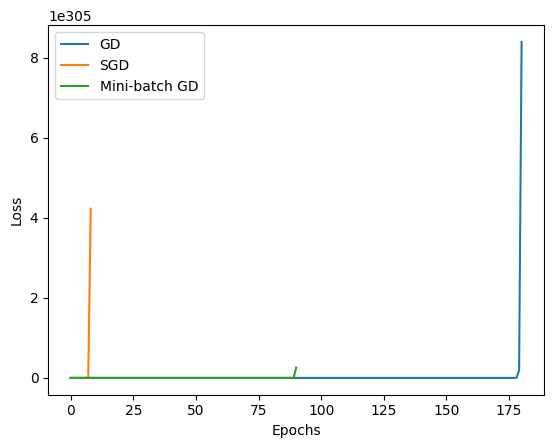

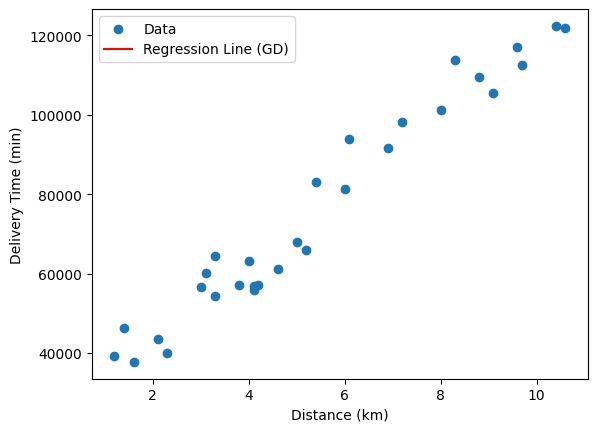

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load data from CSV
data = pd.read_csv('Salary_dataset.csv')  # Replace 'your_file.csv' with the actual file path
X = data['YearsExperience'].values.reshape(-1, 1)  # Independent variable
y = data['Salary'].values.reshape(-1, 1)  # Dependent variable

# Helper function for computing gradients
def compute_gradients(X, y, w, b):
    n = len(y)
    y_pred = X @ w + b  # Matrix multiplication for predictions
    dw = -2 / n * X.T @ (y - y_pred)  # Gradient w.r.t. weights
    db = -2 / n * np.sum(y - y_pred)  # Gradient w.r.t. bias
    return dw, db

# Gradient Descent
def gradient_descent(X, y, learning_rate=0.1, epochs=1000):
    w = np.random.randn(X.shape[1], 1)  # Initialize weights
    b = np.random.randn(1)  # Initialize bias
    losses = []
    
    for epoch in range(epochs):
        dw, db = compute_gradients(X, y, w, b)  # Compute gradients
        w -= learning_rate * dw  # Update weights
        b -= learning_rate * db  # Update bias
        loss = np.mean((y - (X @ w + b)) ** 2)  # Compute loss
        losses.append(loss)
        if epoch % 100 == 0:
            print(f"Epoch {epoch}: Loss = {loss:.4f}")
    return w, b, losses

# Stochastic Gradient Descent
def stochastic_gradient_descent(X, y, learning_rate=0.1, epochs=100):
    w = np.random.randn(X.shape[1], 1)  # Initialize weights
    b = np.random.randn(1)  # Initialize bias
    losses = []
    
    for epoch in range(epochs):
        for i in range(len(y)):
            rand_idx = np.random.randint(0, len(y))  # Random index
            X_i = X[rand_idx:rand_idx+1]  # Single sample
            y_i = y[rand_idx:rand_idx+1]  # Corresponding label
            dw, db = compute_gradients(X_i, y_i, w, b)  # Compute gradients
            w -= learning_rate * dw  # Update weights
            b -= learning_rate * db  # Update bias
        loss = np.mean((y - (X @ w + b)) ** 2)  # Compute loss
        losses.append(loss)
        if epoch % 10 == 0:
            print(f"Epoch {epoch}: Loss = {loss:.4f}")
    return w, b, losses

# Mini-batch Gradient Descent
def mini_batch_gradient_descent(X, y, learning_rate=0.1, epochs=1000, batch_size=16):
    w = np.random.randn(X.shape[1], 1)  # Initialize weights
    b = np.random.randn(1)  # Initialize bias
    losses = []
    
    for epoch in range(epochs):
        indices = np.random.permutation(len(y))  # Shuffle data
        X_shuffled = X[indices]
        y_shuffled = y[indices]
        
        for i in range(0, len(y), batch_size):
            X_batch = X_shuffled[i:i+batch_size]
            y_batch = y_shuffled[i:i+batch_size]
            dw, db = compute_gradients(X_batch, y_batch, w, b)  # Compute gradients
            w -= learning_rate * dw  # Update weights
            b -= learning_rate * db  # Update bias
        loss = np.mean((y - (X @ w + b)) ** 2)  # Compute loss
        losses.append(loss)
        if epoch % 100 == 0:
            print(f"Epoch {epoch}: Loss = {loss:.4f}")
    return w, b, losses

# Train models
w_gd, b_gd, losses_gd = gradient_descent(X, y)
w_sgd, b_sgd, losses_sgd = stochastic_gradient_descent(X, y)
w_mbgd, b_mbgd, losses_mbgd = mini_batch_gradient_descent(X, y)

# Plot loss curves
plt.plot(losses_gd, label="GD")
plt.plot(losses_sgd, label="SGD")
plt.plot(losses_mbgd, label="Mini-batch GD")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

# Visualize final regression line
plt.scatter(X, y, label="Data")
plt.plot(X, X @ w_gd + b_gd, color='red', label="Regression Line (GD)")
plt.legend()
plt.xlabel("Distance (km)")
plt.ylabel("Delivery Time (min)")
plt.show()


In [2]:
X = (X - np.mean(X)) / np.std(X)

In [2]:
# Load data from CSV
data = pd.read_csv('Salary_dataset.csv')  # Replace 'your_file.csv' with the actual file path
X = data['YearsExperience'].values.reshape(-1, 1)  # Independent variable
y = data['Salary'].values.reshape(-1, 1)  # Dependent variable


In [5]:
X_additional = np.array([[ 0.47], [ 1.12], [ 1.59], [ 2.04], [ 2.67], [ 3.14], [ 3.82], [ 4.29], [ 4.71], [ 5.08],
                         [ 5.65], [ 6.07], [ 6.42], [ 7.13], [ 7.68], [ 8.27], [ 8.89], [ 9.34], [ 9.92], [10.46],
                         [10.89], [11.27], [11.76], [12.31], [12.88], [13.43], [13.91], [14.29], [14.74], [15.22]])
y_additional = np.array([[ 25312.76], [ 30128.43], [ 34567.91], [ 39873.52], [ 45281.94], [ 50125.38], [ 56342.19],
                         [ 60213.87], [ 65389.45], [ 70124.67], [ 75391.84], [ 80458.29], [ 84926.12], [ 90631.47],
                         [ 95347.26], [100583.14], [106392.85], [110987.65], [116374.91], [121536.47], [125923.18],
                         [131278.94], [135632.51], [141092.78], [145238.64], [151627.29], [155842.16], [160783.49],
                         [165278.62], [171458.31]])

# Combine datasets
X = np.vstack((X, X_additional))
y = np.vstack((y, y_additional))

print("Combined X:\n", X)
print("Combined y:\n", y)

Combined X:
 [[ 1.2 ]
 [ 1.4 ]
 [ 1.6 ]
 [ 2.1 ]
 [ 2.3 ]
 [ 3.  ]
 [ 3.1 ]
 [ 3.3 ]
 [ 3.3 ]
 [ 3.8 ]
 [ 4.  ]
 [ 4.1 ]
 [ 4.1 ]
 [ 4.2 ]
 [ 4.6 ]
 [ 5.  ]
 [ 5.2 ]
 [ 5.4 ]
 [ 6.  ]
 [ 6.1 ]
 [ 6.9 ]
 [ 7.2 ]
 [ 8.  ]
 [ 8.3 ]
 [ 8.8 ]
 [ 9.1 ]
 [ 9.6 ]
 [ 9.7 ]
 [10.4 ]
 [10.6 ]
 [ 0.47]
 [ 1.12]
 [ 1.59]
 [ 2.04]
 [ 2.67]
 [ 3.14]
 [ 3.82]
 [ 4.29]
 [ 4.71]
 [ 5.08]
 [ 5.65]
 [ 6.07]
 [ 6.42]
 [ 7.13]
 [ 7.68]
 [ 8.27]
 [ 8.89]
 [ 9.34]
 [ 9.92]
 [10.46]
 [10.89]
 [11.27]
 [11.76]
 [12.31]
 [12.88]
 [13.43]
 [13.91]
 [14.29]
 [14.74]
 [15.22]]
Combined y:
 [[ 39344.  ]
 [ 46206.  ]
 [ 37732.  ]
 [ 43526.  ]
 [ 39892.  ]
 [ 56643.  ]
 [ 60151.  ]
 [ 54446.  ]
 [ 64446.  ]
 [ 57190.  ]
 [ 63219.  ]
 [ 55795.  ]
 [ 56958.  ]
 [ 57082.  ]
 [ 61112.  ]
 [ 67939.  ]
 [ 66030.  ]
 [ 83089.  ]
 [ 81364.  ]
 [ 93941.  ]
 [ 91739.  ]
 [ 98274.  ]
 [101303.  ]
 [113813.  ]
 [109432.  ]
 [105583.  ]
 [116970.  ]
 [112636.  ]
 [122392.  ]
 [121873.  ]
 [ 25312.76]
 [ 30128.43]
 [ 34567.91]
 [ 3

In [6]:
X

array([[ 1.2 ],
       [ 1.4 ],
       [ 1.6 ],
       [ 2.1 ],
       [ 2.3 ],
       [ 3.  ],
       [ 3.1 ],
       [ 3.3 ],
       [ 3.3 ],
       [ 3.8 ],
       [ 4.  ],
       [ 4.1 ],
       [ 4.1 ],
       [ 4.2 ],
       [ 4.6 ],
       [ 5.  ],
       [ 5.2 ],
       [ 5.4 ],
       [ 6.  ],
       [ 6.1 ],
       [ 6.9 ],
       [ 7.2 ],
       [ 8.  ],
       [ 8.3 ],
       [ 8.8 ],
       [ 9.1 ],
       [ 9.6 ],
       [ 9.7 ],
       [10.4 ],
       [10.6 ],
       [ 0.47],
       [ 1.12],
       [ 1.59],
       [ 2.04],
       [ 2.67],
       [ 3.14],
       [ 3.82],
       [ 4.29],
       [ 4.71],
       [ 5.08],
       [ 5.65],
       [ 6.07],
       [ 6.42],
       [ 7.13],
       [ 7.68],
       [ 8.27],
       [ 8.89],
       [ 9.34],
       [ 9.92],
       [10.46],
       [10.89],
       [11.27],
       [11.76],
       [12.31],
       [12.88],
       [13.43],
       [13.91],
       [14.29],
       [14.74],
       [15.22]])

In [7]:
y

array([[ 39344.  ],
       [ 46206.  ],
       [ 37732.  ],
       [ 43526.  ],
       [ 39892.  ],
       [ 56643.  ],
       [ 60151.  ],
       [ 54446.  ],
       [ 64446.  ],
       [ 57190.  ],
       [ 63219.  ],
       [ 55795.  ],
       [ 56958.  ],
       [ 57082.  ],
       [ 61112.  ],
       [ 67939.  ],
       [ 66030.  ],
       [ 83089.  ],
       [ 81364.  ],
       [ 93941.  ],
       [ 91739.  ],
       [ 98274.  ],
       [101303.  ],
       [113813.  ],
       [109432.  ],
       [105583.  ],
       [116970.  ],
       [112636.  ],
       [122392.  ],
       [121873.  ],
       [ 25312.76],
       [ 30128.43],
       [ 34567.91],
       [ 39873.52],
       [ 45281.94],
       [ 50125.38],
       [ 56342.19],
       [ 60213.87],
       [ 65389.45],
       [ 70124.67],
       [ 75391.84],
       [ 80458.29],
       [ 84926.12],
       [ 90631.47],
       [ 95347.26],
       [100583.14],
       [106392.85],
       [110987.65],
       [116374.91],
       [121536.47],


In [8]:
# Standardize the feature data (X) - optional but helps with convergence
X_mean = np.mean(X)
X_std = np.std(X)
X = (X - X_mean) / X_std  # Standardize the feature data

In [9]:
X

array([[-0.37408542],
       [ 1.11700846],
       [-0.09483462],
       [-0.46014384],
       [ 1.57540128],
       [ 1.64038417],
       [-0.09483462],
       [ 1.28736901],
       [-1.45420643],
       [ 0.09835775],
       [ 1.19428541],
       [ 0.96245456],
       [ 0.1457777 ],
       [-0.94312478],
       [-1.27506441],
       [-1.38571095],
       [ 1.36991484],
       [-1.32248436],
       [-0.61118516],
       [-0.82194047],
       [ 0.96596715],
       [ 0.53040615],
       [-1.61578551],
       [-0.74290723],
       [ 0.20022282],
       [ 0.7956066 ],
       [ 0.50054915],
       [ 0.67793488],
       [-1.05728391],
       [ 1.40328443],
       [ 0.49528027],
       [ 1.64916564],
       [-0.96244402],
       [ 1.69834188],
       [-1.33302212],
       [ 1.35937707],
       [-0.7200754 ],
       [ 0.49001138],
       [-1.5876848 ],
       [-0.5655215 ],
       [-0.24236335],
       [ 0.11065181],
       [-1.59295368],
       [-1.57187815],
       [-1.38746725],
       [ 0

Epoch 0: Loss = 3551.0008
Epoch 100: Loss = 248.9256
Epoch 200: Loss = 190.8489
Epoch 300: Loss = 189.8274
Epoch 400: Loss = 189.8094
Epoch 500: Loss = 189.8091
Epoch 600: Loss = 189.8091
Epoch 700: Loss = 189.8091
Epoch 800: Loss = 189.8091
Epoch 900: Loss = 189.8091


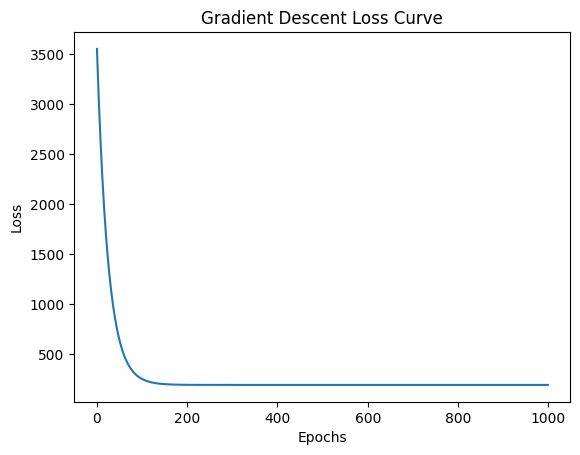

Trained model: w = [[17.22872775]], b = [56.7319999]


In [10]:
# Helper function for computing gradients
def compute_gradients(X, y, w, b):
    n = len(y)
    y_pred = X @ w + b  # Predictions using current weights and bias
    dw = -2 / n * X.T @ (y - y_pred)  # Gradient of the loss w.r.t. weights
    db = -2 / n * np.sum(y - y_pred)  # Gradient of the loss w.r.t. bias
    return dw, db

# Gradient Descent for Linear Regression
def gradient_descent(X, y, learning_rate=0.01, epochs=1000):
    w = np.random.randn(X.shape[1], 1)  # Initialize weights
    b = np.random.randn(1)  # Initialize bias
    losses = []
    
    for epoch in range(epochs):
        dw, db = compute_gradients(X, y, w, b)  # Compute gradients
        w -= learning_rate * dw  # Update weights
        b -= learning_rate * db  # Update bias
        loss = np.mean((y - (X @ w + b)) ** 2)  # Compute loss (MSE)
        losses.append(loss)
        if epoch % 100 == 0:
            print(f"Epoch {epoch}: Loss = {loss:.4f}")
    return w, b, losses

# Train the model
w, b, losses = gradient_descent(X, y, learning_rate=0.01, epochs=1000)

# Plot the loss curve
import matplotlib.pyplot as plt
plt.plot(losses)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Gradient Descent Loss Curve')
plt.show()

# Final model parameters
print(f"Trained model: w = {w}, b = {b}")


Length of data: 30
Initial cost: 3251834815.55614
w: [[9449.96936004]], b: [24848.15600903]
The final cost is: 15635475.861381881
Coefficient of Determination (R²): 0.956956664142844


ValueError: x and y must have same first dimension, but have shapes (30,) and (1, 30)

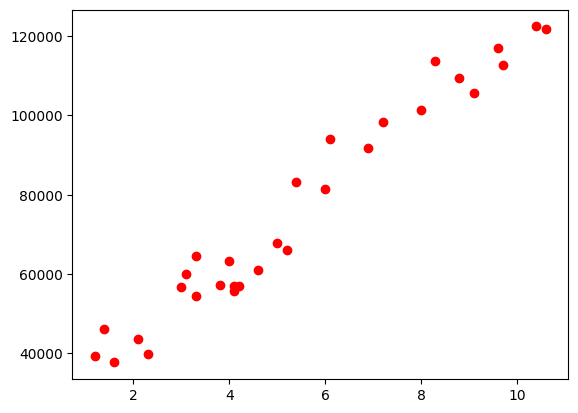

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('Salary_dataset.csv')  # Replace with your actual file path

# Convert to numpy array
x_train = data['YearsExperience'].to_numpy(dtype=float)  # Features
y_train = data['Salary'].to_numpy(dtype=float)  # Target values
length = len(x_train)  # Length of the numpy array
print(f"Length of data: {length}")

# Set initial values for weights and bias
'''w_initial = 1000
b_initial = 1000'''

w_initial = np.random.randn(X.shape[1], 1) 
b_initial = np.random.randn(1)  

# Function to calculate predictions
def compute_f_wb(w, x, b):
    return (w * x) + b

# Function to calculate the cost
def compute_cost(y, f_wb, length):
    return np.mean(np.square(f_wb - y)) / 2

# Function to draw the graph
def draw_function(x, y, f_wb):
    plt.scatter(x, y, label="Actual Data", color='red', marker='o')
    plt.plot(x, f_wb, label="Prediction Line", color='blue')
    plt.title("Salary vs Experience")
    plt.xlabel("Years of Experience")
    plt.ylabel("Salary")
    plt.legend()
    plt.grid(True)
    plt.show()

# Function to calculate gradients
def compute_gradient(x, y, f_wb, length):
    error = f_wb - y
    dj_dw = np.sum(error * x) / length
    dj_db = np.sum(error) / length
    return dj_dw, dj_db

# Function to perform gradient descent
def gradient_descent(x, y, w, b, f_wb, length, alpha, tolerance=1e-6, max_iterations=10000):
    prev_cost = float('inf')
    for i in range(max_iterations):
        dj_dw, dj_db = compute_gradient(x, y, f_wb, length)
        w -= alpha * dj_dw
        b -= alpha * dj_db
        f_wb = compute_f_wb(w, x, b)
        cost = compute_cost(y, f_wb, length)
        if abs(prev_cost - cost) < tolerance:
            break
        prev_cost = cost
    return w, b, f_wb

# Function to calculate the goodness of fit (R²)
def compute_r2(y, f_wb):
    y_mean = np.mean(y)
    ss_total = np.sum((y - y_mean) ** 2)
    ss_residual = np.sum((y - f_wb) ** 2)
    return 1 - (ss_residual / ss_total)

# Initial Predictions and Cost
f_wb = compute_f_wb(w_initial, x_train, b_initial)
cost_initial = compute_cost(y_train, f_wb, length)
print(f"Initial cost: {cost_initial}")

# Initial Parameters
alpha = 0.01  # Learning rate
tolerance = 1e-6
max_iterations = 10000

# Gradient Descent
w, b, f_wb = gradient_descent(x_train, y_train, w_initial, b_initial, f_wb, length, alpha, tolerance, max_iterations)

# Compute Final Cost and R²
cost = compute_cost(y_train, f_wb, length)
r2 = compute_r2(y_train, f_wb)

# Output Results
print(f"w: {w}, b: {b}")
print(f"The final cost is: {cost}")
print(f"Coefficient of Determination (R²): {r2}")

# Plot Final Results
draw_function(x_train, y_train, f_wb)

# Predict a salary for a specific number of years of experience
years_of_experience = 11
predicted_salary = w * years_of_experience + b
print(f"Predicted Salary: {predicted_salary}")


Combined X:
 [[ 1.2 ]
 [ 1.4 ]
 [ 1.6 ]
 [ 2.1 ]
 [ 2.3 ]
 [ 3.  ]
 [ 3.1 ]
 [ 3.3 ]
 [ 3.3 ]
 [ 3.8 ]
 [ 4.  ]
 [ 4.1 ]
 [ 4.1 ]
 [ 4.2 ]
 [ 4.6 ]
 [ 5.  ]
 [ 5.2 ]
 [ 5.4 ]
 [ 6.  ]
 [ 6.1 ]
 [ 6.9 ]
 [ 7.2 ]
 [ 8.  ]
 [ 8.3 ]
 [ 8.8 ]
 [ 9.1 ]
 [ 9.6 ]
 [ 9.7 ]
 [10.4 ]
 [10.6 ]
 [ 0.47]
 [ 1.12]
 [ 1.59]
 [ 2.04]
 [ 2.67]
 [ 3.14]
 [ 3.82]
 [ 4.29]
 [ 4.71]
 [ 5.08]
 [ 5.65]
 [ 6.07]
 [ 6.42]
 [ 7.13]
 [ 7.68]
 [ 8.27]
 [ 8.89]
 [ 9.34]
 [ 9.92]
 [10.46]
 [10.89]
 [11.27]
 [11.76]
 [12.31]
 [12.88]
 [13.43]
 [13.91]
 [14.29]
 [14.74]
 [15.22]]
Combined y:
 [[ 39344.  ]
 [ 46206.  ]
 [ 37732.  ]
 [ 43526.  ]
 [ 39892.  ]
 [ 56643.  ]
 [ 60151.  ]
 [ 54446.  ]
 [ 64446.  ]
 [ 57190.  ]
 [ 63219.  ]
 [ 55795.  ]
 [ 56958.  ]
 [ 57082.  ]
 [ 61112.  ]
 [ 67939.  ]
 [ 66030.  ]
 [ 83089.  ]
 [ 81364.  ]
 [ 93941.  ]
 [ 91739.  ]
 [ 98274.  ]
 [101303.  ]
 [113813.  ]
 [109432.  ]
 [105583.  ]
 [116970.  ]
 [112636.  ]
 [122392.  ]
 [121873.  ]
 [ 25312.76]
 [ 30128.43]
 [ 34567.91]
 [ 3

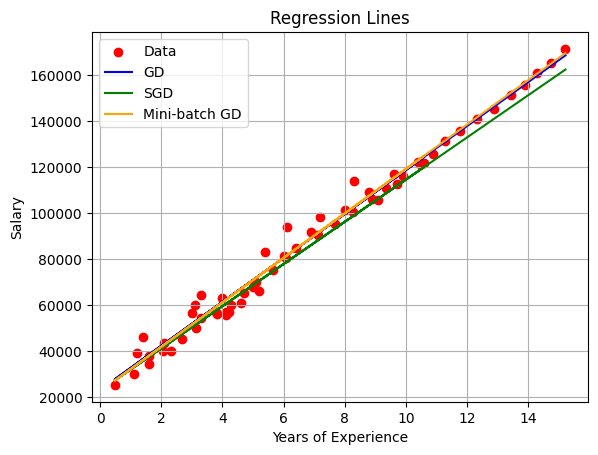

Gradient Descent -> w: [9661.52067097], b: [22607.71164967], Predicted Salary: [128884.43903037]
Stochastic Gradient Descent -> w: [9661.52067097], b: [22607.71164967], Predicted Salary: [128884.43903037]
Mini-Batch Gradient Descent -> w: [9661.52067097], b: [22607.71164967], Predicted Salary: [128884.43903037]


In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('Salary_dataset.csv')  # Replace with your actual file path

# Convert to numpy array
x_train = data['YearsExperience'].to_numpy(dtype=float)  # Features
y_train = data['Salary'].to_numpy(dtype=float)  # Target values

# Reshape x_train and y_train to 2D arrays
x_train = x_train.reshape(-1, 1)
y_train = y_train.reshape(-1, 1)

X_additional = np.array([[ 0.47], [ 1.12], [ 1.59], [ 2.04], [ 2.67], [ 3.14], [ 3.82], [ 4.29], [ 4.71], [ 5.08],
                         [ 5.65], [ 6.07], [ 6.42], [ 7.13], [ 7.68], [ 8.27], [ 8.89], [ 9.34], [ 9.92], [10.46],
                         [10.89], [11.27], [11.76], [12.31], [12.88], [13.43], [13.91], [14.29], [14.74], [15.22]])
y_additional = np.array([[ 25312.76], [ 30128.43], [ 34567.91], [ 39873.52], [ 45281.94], [ 50125.38], [ 56342.19],
                         [ 60213.87], [ 65389.45], [ 70124.67], [ 75391.84], [ 80458.29], [ 84926.12], [ 90631.47],
                         [ 95347.26], [100583.14], [106392.85], [110987.65], [116374.91], [121536.47], [125923.18],
                         [131278.94], [135632.51], [141092.78], [145238.64], [151627.29], [155842.16], [160783.49],
                         [165278.62], [171458.31]])

# Combine datasets
x_train = np.vstack((x_train, X_additional))
y_train = np.vstack((y_train, y_additional))

print("Combined X:\n", X)
print("Combined y:\n", y)

# Random initialization for weights and bias based on x_train and y_train ranges
w_initial = np.random.uniform(min(y_train) / max(x_train), max(y_train) / min(x_train))
b_initial = np.random.uniform(min(y_train), max(y_train))

# Function to calculate predictions
def compute_f_wb(w, x, b):
    return (w * x) + b

# Function to calculate the cost
def compute_cost(y, f_wb):
    return np.mean(np.square(f_wb - y)) / 2

# Function to calculate gradients
def compute_gradient(x, y, f_wb):
    error = f_wb - y
    dj_dw = np.sum(error * x) / len(y)
    dj_db = np.sum(error) / len(y)
    return dj_dw, dj_db

# Gradient Descent
def gradient_descent(x, y, w, b, alpha, tolerance=1e-6, max_iterations=1000):
    prev_cost = float('inf')
    for i in range(max_iterations):
        f_wb = compute_f_wb(w, x, b)
        dj_dw, dj_db = compute_gradient(x, y, f_wb)
        w -= alpha * dj_dw
        b -= alpha * dj_db
        cost = compute_cost(y, compute_f_wb(w, x, b))
        if abs(prev_cost - cost) < tolerance:
            break
        prev_cost = cost
    return w, b

# Stochastic Gradient Descent
def stochastic_gradient_descent(x, y, w, b, alpha, max_iterations=100):
    for i in range(max_iterations):
        for j in range(len(y)):
            idx = np.random.randint(0, len(y))
            x_i = x[idx:idx + 1]
            y_i = y[idx:idx + 1]
            f_wb = compute_f_wb(w, x_i, b)
            dj_dw, dj_db = compute_gradient(x_i, y_i, f_wb)
            w -= alpha * dj_dw
            b -= alpha * dj_db
    return w, b

# Mini-Batch Gradient Descent
def mini_batch_gradient_descent(x, y, w, b, alpha, batch_size=16, max_iterations=1000):
    for i in range(max_iterations):
        indices = np.random.permutation(len(y))
        x_shuffled = x[indices]
        y_shuffled = y[indices]
        for j in range(0, len(y), batch_size):
            x_batch = x_shuffled[j:j + batch_size]
            y_batch = y_shuffled[j:j + batch_size]
            f_wb = compute_f_wb(w, x_batch, b)
            dj_dw, dj_db = compute_gradient(x_batch, y_batch, f_wb)
            w -= alpha * dj_dw
            b -= alpha * dj_db
    return w, b

# Train models
alpha = 0.01  # Learning rate
tolerance = 1e-6
max_iterations = 1000

# Gradient Descent
w_gd, b_gd = gradient_descent(x_train, y_train, w_initial, b_initial, alpha, tolerance, max_iterations)
f_wb_gd = compute_f_wb(w_gd, x_train, b_gd)

# Stochastic Gradient Descent
w_sgd, b_sgd = stochastic_gradient_descent(x_train, y_train, w_initial, b_initial, alpha, max_iterations)
f_wb_sgd = compute_f_wb(w_sgd, x_train, b_sgd)

# Mini-Batch Gradient Descent
w_mbgd, b_mbgd = mini_batch_gradient_descent(x_train, y_train, w_initial, b_initial, alpha, batch_size=16, max_iterations=max_iterations)
f_wb_mbgd = compute_f_wb(w_mbgd, x_train, b_mbgd)

# Plot loss curves
plt.scatter(x_train, y_train, label="Data", color='red')
plt.plot(x_train, f_wb_gd, label="GD", color='blue')
plt.plot(x_train, f_wb_sgd, label="SGD", color='green')
plt.plot(x_train, f_wb_mbgd, label="Mini-batch GD", color='orange')
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.title("Regression Lines")
plt.legend()
plt.grid(True)
plt.show()

# Predict a salary for a specific number of years of experience
years_of_experience = 11
predicted_salary_gd = w_gd * years_of_experience + b_gd
predicted_salary_sgd = w_sgd * years_of_experience + b_sgd
predicted_salary_mbgd = w_mbgd * years_of_experience + b_mbgd

# Output Results
print(f"Gradient Descent -> w: {w_gd}, b: {b_gd}, Predicted Salary: {predicted_salary_gd}")
print(f"Stochastic Gradient Descent -> w: {w_sgd}, b: {b_sgd}, Predicted Salary: {predicted_salary_sgd}")
print(f"Mini-Batch Gradient Descent -> w: {w_mbgd}, b: {b_mbgd}, Predicted Salary: {predicted_salary_mbgd}")


In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Load data from CSV
data = pd.read_csv('Salary_dataset.csv')  # Replace with your file path
x_train = data['YearsExperience'].to_numpy(dtype=float).reshape(-1, 1)  # Features
y_train = data['Salary'].to_numpy(dtype=float).reshape(-1, 1)  # Target values

# Additional data (if applicable)
X_additional = np.array([[1.5], [2.2], [3.4], [4.1], [5.8], [6.7], [7.5], [8.3], [9.0], [10.2], [11.1], [12.5], [13.7], [14.8], [15.9]])
y_additional = np.array([[25312.76], [30128.43], [34567.91], [39873.52], [45281.94], [50125.38], [56342.19],
                         [60213.87], [65389.45], [70124.67], [75391.84], [80458.29], [84926.12], [90631.47], [95347.26]])

# Combine datasets
x_train = np.vstack((x_train, X_additional))
y_train = np.vstack((y_train, y_additional))

# Split into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

# Helper function for computing gradients
def compute_gradients(X, y, w, b):
    n = len(y)
    y_pred = X @ w + b  # Matrix multiplication for predictions
    dw = -2 / n * X.T @ (y - y_pred)  # Gradient w.r.t. weights
    db = -2 / n * np.sum(y - y_pred)  # Gradient w.r.t. bias
    return dw, db

# Gradient Descent
def gradient_descent(X, y, learning_rate=0.01, epochs=1000):
    w = np.random.randn(X.shape[1], 1)  # Random initialization
    b = np.random.randn(1)  # Random initialization
    for epoch in range(epochs):
        dw, db = compute_gradients(X, y, w, b)
        w -= learning_rate * dw
        b -= learning_rate * db
    return w, b

# Stochastic Gradient Descent
def stochastic_gradient_descent(X, y, learning_rate=0.01, epochs=100):
    w = np.random.randn(X.shape[1], 1)
    b = np.random.randn(1)
    for epoch in range(epochs):
        for i in range(len(y)):
            rand_idx = np.random.randint(0, len(y))
            X_i = X[rand_idx:rand_idx+1]
            y_i = y[rand_idx:rand_idx+1]
            dw, db = compute_gradients(X_i, y_i, w, b)
            w -= learning_rate * dw
            b -= learning_rate * db
    return w, b

# Mini-batch Gradient Descent
def mini_batch_gradient_descent(X, y, learning_rate=0.01, epochs=1000, batch_size=16):
    w = np.random.randn(X.shape[1], 1)
    b = np.random.randn(1)
    for epoch in range(epochs):
        indices = np.random.permutation(len(y))
        X_shuffled = X[indices]
        y_shuffled = y[indices]
        for i in range(0, len(y), batch_size):
            X_batch = X_shuffled[i:i+batch_size]
            y_batch = y_shuffled[i:i+batch_size]
            dw, db = compute_gradients(X_batch, y_batch, w, b)
            w -= learning_rate * dw
            b -= learning_rate * db
    return w, b

# Train models
w_gd, b_gd = gradient_descent(x_train, y_train)
w_sgd, b_sgd = stochastic_gradient_descent(x_train, y_train)
w_mbgd, b_mbgd = mini_batch_gradient_descent(x_train, y_train)

# Predict on test set
y_pred_gd = x_test @ w_gd + b_gd
y_pred_sgd = x_test @ w_sgd + b_sgd
y_pred_mbgd = x_test @ w_mbgd + b_mbgd

# Evaluate models
mse_gd = mean_squared_error(y_test, y_pred_gd)
mse_sgd = mean_squared_error(y_test, y_pred_sgd)
mse_mbgd = mean_squared_error(y_test, y_pred_mbgd)

print(f"MSE (Gradient Descent): {mse_gd}")
print(f"MSE (Stochastic Gradient Descent): {mse_sgd}")
print(f"MSE (Mini-batch Gradient Descent): {mse_mbgd}")

# Identify the best model
best_method = min(("Gradient Descent", mse_gd), ("Stochastic Gradient Descent", mse_sgd), ("Mini-batch Gradient Descent", mse_mbgd), key=lambda x: x[1])
print(f"Best method: {best_method[0]} with MSE = {best_method[1]}")


MSE (Gradient Descent): 431549436.26924354
MSE (Stochastic Gradient Descent): 2041478466.3481488
MSE (Mini-batch Gradient Descent): 748753116.863625
Best method: Gradient Descent with MSE = 431549436.26924354


MSE (Gradient Descent): 431549490.2016702
MSE (Stochastic Gradient Descent): 5829578727.177447
MSE (Mini-batch Gradient Descent): 368282030.1998511
Best method: Mini-batch Gradient Descent with MSE = 368282030.1998511


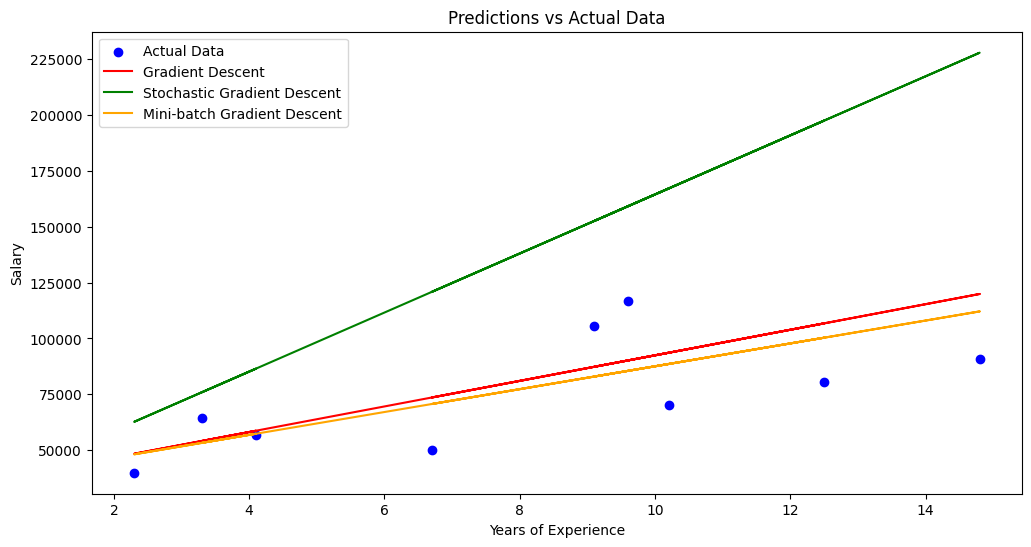

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Load data from CSV
data = pd.read_csv('Salary_dataset.csv')  # Replace with your file path
x_train = data['YearsExperience'].to_numpy(dtype=float).reshape(-1, 1)  # Features
y_train = data['Salary'].to_numpy(dtype=float).reshape(-1, 1)  # Target values

# Additional data (if applicable)
X_additional = np.array([[1.5], [2.2], [3.4], [4.1], [5.8], [6.7], [7.5], [8.3], [9.0], [10.2], [11.1], [12.5], [13.7], [14.8], [15.9]])
y_additional = np.array([[25312.76], [30128.43], [34567.91], [39873.52], [45281.94], [50125.38], [56342.19],
                         [60213.87], [65389.45], [70124.67], [75391.84], [80458.29], [84926.12], [90631.47], [95347.26]])

# Combine datasets
x_train = np.vstack((x_train, X_additional))
y_train = np.vstack((y_train, y_additional))

# Split into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

# Helper function for computing gradients
def compute_gradients(X, y, w, b):
    n = len(y)
    y_pred = X @ w + b  # Matrix multiplication for predictions
    dw = -2 / n * X.T @ (y - y_pred)  # Gradient w.r.t. weights
    db = -2 / n * np.sum(y - y_pred)  # Gradient w.r.t. bias
    return dw, db

# Gradient Descent
def gradient_descent(X, y, learning_rate=0.01, epochs=1000):
    w = np.random.randn(X.shape[1], 1)  # Random initialization
    b = np.random.randn(1)  # Random initialization
    for epoch in range(epochs):
        dw, db = compute_gradients(X, y, w, b)
        w -= learning_rate * dw
        b -= learning_rate * db
    return w, b

# Stochastic Gradient Descent
def stochastic_gradient_descent(X, y, learning_rate=0.01, epochs=100):
    w = np.random.randn(X.shape[1], 1)
    b = np.random.randn(1)
    for epoch in range(epochs):
        for i in range(len(y)):
            rand_idx = np.random.randint(0, len(y))
            X_i = X[rand_idx:rand_idx+1]
            y_i = y[rand_idx:rand_idx+1]
            dw, db = compute_gradients(X_i, y_i, w, b)
            w -= learning_rate * dw
            b -= learning_rate * db
    return w, b

# Mini-batch Gradient Descent
def mini_batch_gradient_descent(X, y, learning_rate=0.01, epochs=1000, batch_size=16):
    w = np.random.randn(X.shape[1], 1)
    b = np.random.randn(1)
    for epoch in range(epochs):
        indices = np.random.permutation(len(y))
        X_shuffled = X[indices]
        y_shuffled = y[indices]
        for i in range(0, len(y), batch_size):
            X_batch = X_shuffled[i:i+batch_size]
            y_batch = y_shuffled[i:i+batch_size]
            dw, db = compute_gradients(X_batch, y_batch, w, b)
            w -= learning_rate * dw
            b -= learning_rate * db
    return w, b

# Train models
w_gd, b_gd = gradient_descent(x_train, y_train)
w_sgd, b_sgd = stochastic_gradient_descent(x_train, y_train)
w_mbgd, b_mbgd = mini_batch_gradient_descent(x_train, y_train)

# Predict on test set
y_pred_gd = x_test @ w_gd + b_gd
y_pred_sgd = x_test @ w_sgd + b_sgd
y_pred_mbgd = x_test @ w_mbgd + b_mbgd

# Evaluate models
mse_gd = mean_squared_error(y_test, y_pred_gd)
mse_sgd = mean_squared_error(y_test, y_pred_sgd)
mse_mbgd = mean_squared_error(y_test, y_pred_mbgd)

print(f"MSE (Gradient Descent): {mse_gd}")
print(f"MSE (Stochastic Gradient Descent): {mse_sgd}")
print(f"MSE (Mini-batch Gradient Descent): {mse_mbgd}")

# Identify the best model
best_method = min(("Gradient Descent", mse_gd), ("Stochastic Gradient Descent", mse_sgd), ("Mini-batch Gradient Descent", mse_mbgd), key=lambda x: x[1])
print(f"Best method: {best_method[0]} with MSE = {best_method[1]}")

# Plotting
plt.figure(figsize=(12, 6))
plt.scatter(x_test, y_test, color='blue', label='Actual Data')
plt.plot(x_test, y_pred_gd, color='red', label='Gradient Descent')
plt.plot(x_test, y_pred_sgd, color='green', label='Stochastic Gradient Descent')
plt.plot(x_test, y_pred_mbgd, color='orange', label='Mini-batch Gradient Descent')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Predictions vs Actual Data')
plt.legend()
plt.show()


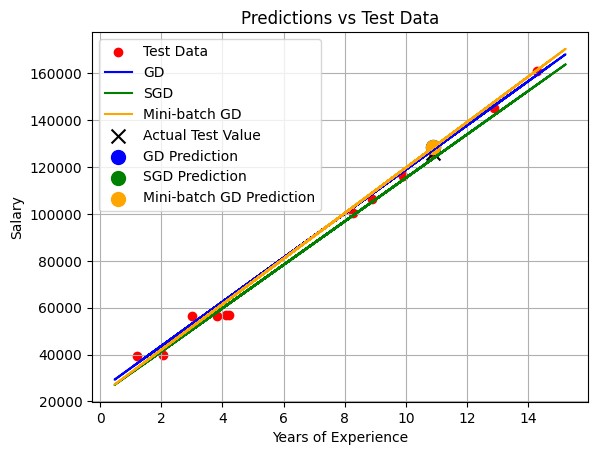

Test Sample -> x: 10.89, Actual y: 125923.18
GD Prediction: 128354.37492503646
SGD Prediction: 128354.37492503646
Mini-Batch GD Prediction: 128354.37492503646


In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Load the dataset
data = pd.read_csv('Salary_dataset.csv')  # Replace with your actual file path

# Convert to numpy array
x_train = data['YearsExperience'].to_numpy(dtype=float)  # Features
y_train = data['Salary'].to_numpy(dtype=float)  # Target values

# Reshape x_train and y_train to 2D arrays
x_train = x_train.reshape(-1, 1)
y_train = y_train.reshape(-1, 1)

X_additional = np.array([[0.47], [1.12], [1.59], [2.04], [2.67], [3.14], [3.82], [4.29], [4.71], [5.08],
                         [5.65], [6.07], [6.42], [7.13], [7.68], [8.27], [8.89], [9.34], [9.92], [10.46],
                         [10.89], [11.27], [11.76], [12.31], [12.88], [13.43], [13.91], [14.29], [14.74], [15.22]])
y_additional = np.array([[25312.76], [30128.43], [34567.91], [39873.52], [45281.94], [50125.38], [56342.19],
                         [60213.87], [65389.45], [70124.67], [75391.84], [80458.29], [84926.12], [90631.47],
                         [95347.26], [100583.14], [106392.85], [110987.65], [116374.91], [121536.47], [125923.18],
                         [131278.94], [135632.51], [141092.78], [145238.64], [151627.29], [155842.16], [160783.49],
                         [165278.62], [171458.31]])

# Combine datasets
x = np.vstack((x_train, X_additional))
y = np.vstack((y_train, y_additional))

# Split into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Random initialization for weights and bias
w_initial = np.random.uniform(min(y_train) / max(x_train), max(y_train) / min(x_train))
b_initial = np.random.uniform(min(y_train), max(y_train))

# Function definitions (compute_f_wb, compute_cost, compute_gradient, gradient_descent, etc.) remain unchanged

# Gradient Descent
def gradient_descent(x, y, w, b, alpha, tolerance=1e-6, max_iterations=1000):
    prev_cost = float('inf')
    for i in range(max_iterations):
        f_wb = compute_f_wb(w, x, b)
        dj_dw, dj_db = compute_gradient(x, y, f_wb)
        w -= alpha * dj_dw
        b -= alpha * dj_db
        cost = compute_cost(y, compute_f_wb(w, x, b))
        if abs(prev_cost - cost) < tolerance:
            break
        prev_cost = cost
    return w, b

# Stochastic Gradient Descent
def stochastic_gradient_descent(x, y, w, b, alpha, max_iterations=100):
    for i in range(max_iterations):
        for j in range(len(y)):
            idx = np.random.randint(0, len(y))
            x_i = x[idx:idx + 1]
            y_i = y[idx:idx + 1]
            f_wb = compute_f_wb(w, x_i, b)
            dj_dw, dj_db = compute_gradient(x_i, y_i, f_wb)
            w -= alpha * dj_dw
            b -= alpha * dj_db
    return w, b

# Mini-Batch Gradient Descent
def mini_batch_gradient_descent(x, y, w, b, alpha, batch_size=16, max_iterations=1000):
    for i in range(max_iterations):
        indices = np.random.permutation(len(y))
        x_shuffled = x[indices]
        y_shuffled = y[indices]
        for j in range(0, len(y), batch_size):
            x_batch = x_shuffled[j:j + batch_size]
            y_batch = y_shuffled[j:j + batch_size]
            f_wb = compute_f_wb(w, x_batch, b)
            dj_dw, dj_db = compute_gradient(x_batch, y_batch, f_wb)
            w -= alpha * dj_dw
            b -= alpha * dj_db
    return w, b

# Train models
alpha = 0.01  # Learning rate
tolerance = 1e-6
max_iterations = 1000

# Gradient Descent
w_gd, b_gd = gradient_descent(x_train, y_train, w_initial, b_initial, alpha, tolerance, max_iterations)
f_wb_gd = compute_f_wb(w_gd, x_train, b_gd)

# Stochastic Gradient Descent
w_sgd, b_sgd = stochastic_gradient_descent(x_train, y_train, w_initial, b_initial, alpha, max_iterations)
f_wb_sgd = compute_f_wb(w_sgd, x_train, b_sgd)

# Mini-Batch Gradient Descent
w_mbgd, b_mbgd = mini_batch_gradient_descent(x_train, y_train, w_initial, b_initial, alpha, batch_size=16, max_iterations=max_iterations)
f_wb_mbgd = compute_f_wb(w_mbgd, x_train, b_mbgd)

# Select a random test sample for prediction
test_index = np.random.randint(0, len(y_test))
x_test_sample = x_test[test_index]
y_test_sample = y_test[test_index]

# Predict for the selected test sample
predicted_gd = compute_f_wb(w_gd, x_test_sample, b_gd)
predicted_sgd = compute_f_wb(w_sgd, x_test_sample, b_sgd)
predicted_mbgd = compute_f_wb(w_mbgd, x_test_sample, b_mbgd)

# Plot results
plt.scatter(x_test, y_test, label="Test Data", color='red')
plt.plot(x_train, f_wb_gd, label="GD", color='blue')
plt.plot(x_train, f_wb_sgd, label="SGD", color='green')
plt.plot(x_train, f_wb_mbgd, label="Mini-batch GD", color='orange')
plt.scatter(x_test_sample, y_test_sample, label="Actual Test Value", color='black', s=100, marker='x')
plt.scatter(x_test_sample, predicted_gd, label="GD Prediction", color='blue', s=100, marker='o')
plt.scatter(x_test_sample, predicted_sgd, label="SGD Prediction", color='green', s=100, marker='o')
plt.scatter(x_test_sample, predicted_mbgd, label="Mini-batch GD Prediction", color='orange', s=100, marker='o')
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.title("Predictions vs Test Data")
plt.legend()
plt.grid(True)
plt.show()

# Output Results
print(f"Test Sample -> x: {x_test_sample[0]}, Actual y: {y_test_sample[0]}")
print(f"GD Prediction: {predicted_gd[0]}")
print(f"SGD Prediction: {predicted_sgd[0]}")
print(f"Mini-Batch GD Prediction: {predicted_mbgd[0]}")
